## Linear Classifier

In [ ]:
%pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:

# Make toy dataset

x1 = np.array([1, -1, -1], dtype=np.float32)
x2 = np.array([1, 1, -1], dtype=np.float32)
y = np.array([0, 1, 2])

x1 = np.repeat(x1, 100)
x2 = np.repeat(x2, 100)
y = np.repeat(y,100)

In [ ]:
# add some noise
x1 += np.random.randn(len(x1)) * 0.05
x2 += np.random.randn(len(x2)) * 0.05

In [ ]:
index_shuffle = np.arange(len(x1))
np.random.shuffle(index_shuffle)

In [ ]:

x1 = x1[index_shuffle]
x2 = x2[index_shuffle]
y = y[index_shuffle]

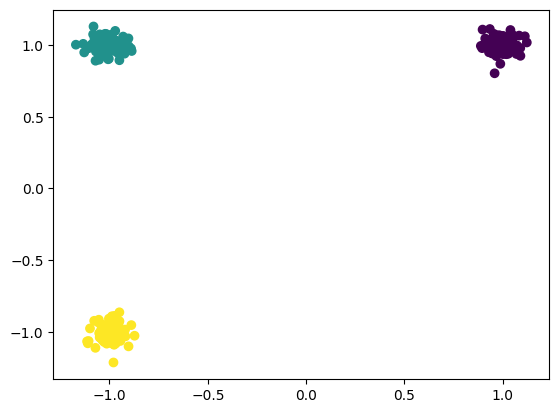

In [ ]:
plt.scatter(x1, x2, c=y)

In [ ]:
x1_torch = torch.from_numpy(x1).view(-1, 1)
x2_torch = torch.from_numpy(x2).view(-1, 1)
y = torch.from_numpy(y).view(-1, 1)

In [ ]:

X = torch.hstack([x1_torch, x2_torch])

In [ ]:
X_train = X[:250, :]
X_test = X[250:, :]
y_train = y[:250, :]
y_test = y[250:, :]

In [ ]:
X_train.shape

torch.Size([250, 2])

In [ ]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim=2, output_dim=3):
        super(LinearClassifier, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
all_loss = []

In [ ]:
for epoch in range(1000):
    output = model(X_train)

    loss = criterion(output, y_train.view(-1))
    all_loss.append(loss.item())
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

In [ ]:
model.forward(torch.tensor([1., 1.]))

tensor([ 1.8157, -0.4004, -2.3455], grad_fn=<AddBackward0>)

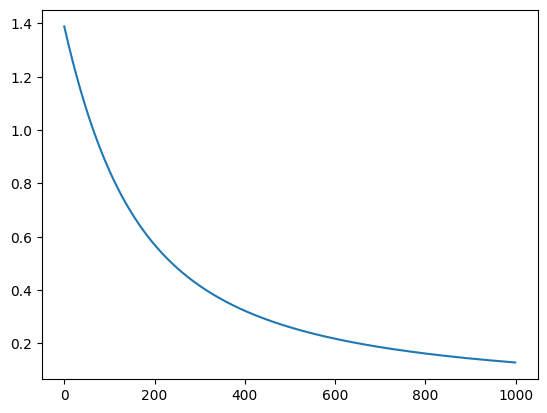

In [ ]:
plt.plot(all_loss)

In [ ]:
w, b = model.parameters()
print(w)

Parameter containing:
tensor([[ 1.3648,  0.8905],
        [-1.0038,  0.7997],
        [-0.7459, -1.5261]], requires_grad=True)


## MNIST

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.1307], [0.3081])
])

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', download=True, train=True , transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 88932953.82it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 76668160.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22307959.82it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5312473.16it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testLoader  = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

In [ ]:
classes = np.arange(0, 10, 1)
dataiter = next(iter(trainLoader))
images, labels = dataiter

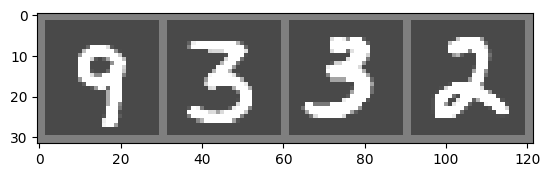

In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

imshow(torchvision.utils.make_grid(images))

In [ ]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=28*28, output_dim=10):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    x = self.linear(x)
    return x

In [ ]:
model  = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
all_loss = []

for epoch in range(10):

  temp_loss = []

  for images, labels in trainLoader:
    output = model(images.view(images.shape[0], -1))

    loss = criterion(output, labels)
    loss.backward()

    temp_loss.append(loss.item())

    optimizer.step()
    optimizer.zero_grad()

  all_loss.append(np.mean(temp_loss))
  print(f"Epoch: {epoch}, loss: {np.mean(temp_loss)}")

Epoch: 0, loss: 0.4261975324900976
Epoch: 1, loss: 0.3166638530844512
Epoch: 2, loss: 0.2995961324019358
Epoch: 3, loss: 0.2900931015445579
Epoch: 4, loss: 0.2842425808267241
Epoch: 5, loss: 0.27958334990647465
Epoch: 6, loss: 0.2762465414619073
Epoch: 7, loss: 0.27329117603453196
Epoch: 8, loss: 0.27062717127828606
Epoch: 9, loss: 0.2690373206962404


In [ ]:
# test

correct, total = 0, 0

with torch.no_grad():

  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))

    _, predicted = torch.max(output.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()


In [ ]:
correct, total = 0, 0

with torch.no_grad():

  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))

    _, predicted = torch.max(output.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()